### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe (since there are 81 features/columns)
pd.pandas.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('HousePricePred.csv')

In [3]:
df = pd.DataFrame(data)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## EDA

### 1) Duplicate records

In [7]:
# checking for any duplicate records

df.duplicated().sum()

0

In [8]:
dup_rows = df[df.duplicated()]
print("Duplicated Rows is",dup_rows.shape)

Duplicated Rows is (0, 81)


### 2) Null values

In [9]:
# checking null values

print('Null values')
print("-"*75)
pd.set_option('display.max_rows', None)
df.isnull().sum()

Null values
---------------------------------------------------------------------------


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
# To get a better picture of what percentage of nan values are present in the features
print('Percentage of Missing values in features')
print("-"*75)
for feature in df.columns:
    if df[feature].isnull().sum()>=1:
        print(feature+': ', df[feature].isnull().mean().round(4), ' %')

Percentage of Missing values in features
---------------------------------------------------------------------------
LotFrontage:  0.1774  %
Alley:  0.9377  %
MasVnrType:  0.0055  %
MasVnrArea:  0.0055  %
BsmtQual:  0.0253  %
BsmtCond:  0.0253  %
BsmtExposure:  0.026  %
BsmtFinType1:  0.0253  %
BsmtFinType2:  0.026  %
Electrical:  0.0007  %
FireplaceQu:  0.4726  %
GarageType:  0.0555  %
GarageYrBlt:  0.0555  %
GarageFinish:  0.0555  %
GarageQual:  0.0555  %
GarageCond:  0.0555  %
PoolQC:  0.9952  %
Fence:  0.8075  %
MiscFeature:  0.963  %


1. **'Alley', 'MiscFeature', 'Fence'** & **'PoolQC'** have more than 80% of missing values, hence **can be dropped** (in feature engineering section).
2. Remaining features have very less missing values, hence we need to perform **missing value imputation** for these features (in FE).

In [11]:
print('Unique values in features')
print("-"*75)
for feature in df.columns:
    if df[feature].nunique()==len(df):
        print(feature+':', df[feature].nunique())

Unique values in features
---------------------------------------------------------------------------
Id: 1460


**'Id' column** has all unique values which will not add any meaningful insights to the model. Hence **can be dropped** in feature engineering part.

### 3) Analyzing variables

#### a) Numerical variables

In [12]:
# list of numerical variables

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'object']
print('Number of numerical variables: ', len(numerical_features))
print("-"*75)
numerical_features

Number of numerical variables:  38
---------------------------------------------------------------------------


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [13]:
df[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [14]:
# list of variables that contain year information

year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

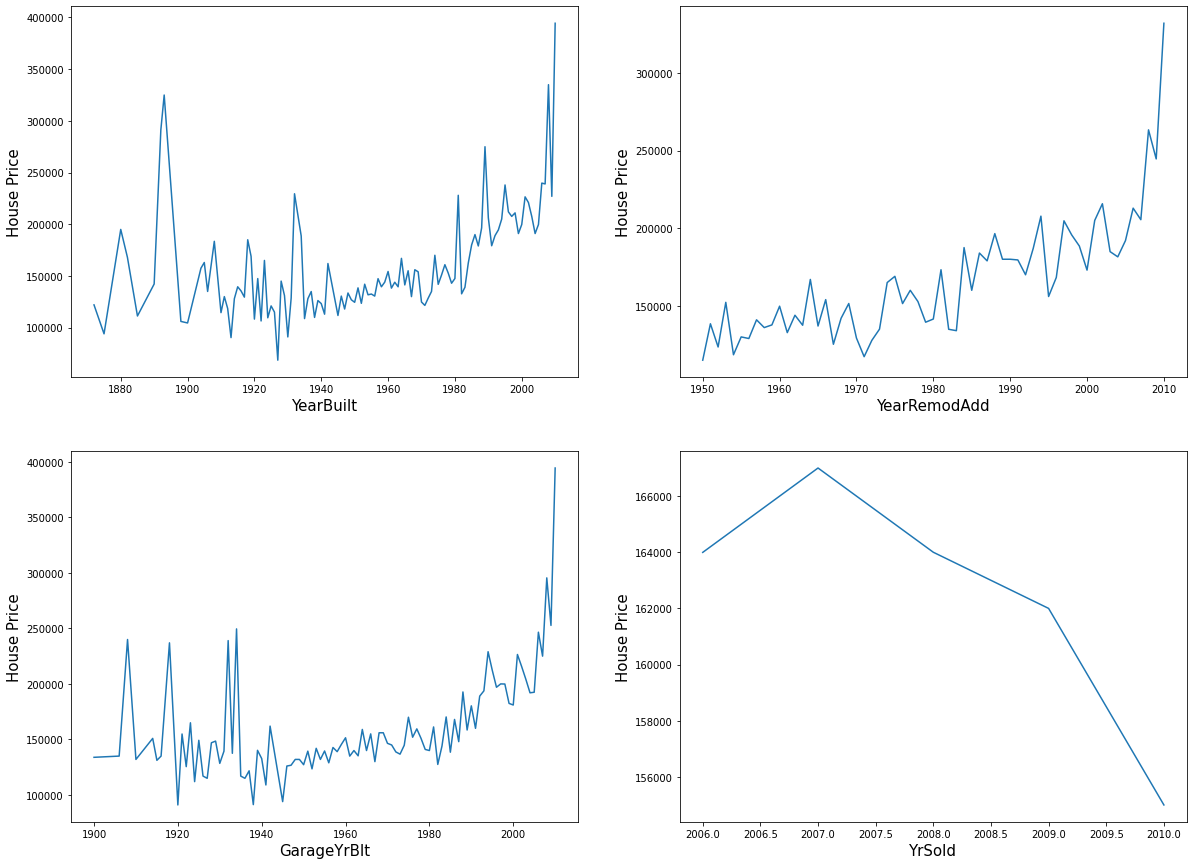

In [15]:
# Analyzing the Temporal Datetime Variables: relation between year features and the sales price

plt.figure(figsize=(20,15))
plotnumber = 1

for feature in year_feature:
    if plotnumber<=4 :
        x = plt.subplot(2,2,plotnumber)
        df.groupby(feature)['SalePrice'].median().plot()
        plt.xlabel(feature, fontsize=15)
        plt.ylabel('House Price', fontsize=15)
    plotnumber+=1
plt.show()

1. The recent the **YearBuilt**, **YearRemodAdd** & **GarageYrBlt**, the greater the house price which is self explanatory.
2. But same is not true for **YrSold**.

In [16]:
## To better understand why house prices have decreased even when the YrSold is recent.
# Let's first filter out the records where "YrSold > 2007"

filt1 = (df['YrSold']>2007.0)
df.loc[filt1, ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'LotArea', 'SaleCondition', 'SalePrice']].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,LotArea,SaleCondition,SalePrice
0,2003,2003,2003.0,2008,8450,Normal,208500
2,2001,2002,2001.0,2008,11250,Normal,223500
4,2000,2000,2000.0,2008,14260,Normal,250000
5,1993,1995,1993.0,2009,14115,Normal,143000
7,1973,1973,1973.0,2009,10382,Normal,200000
8,1931,1950,1931.0,2008,6120,Abnorml,129900
9,1939,1950,1939.0,2008,7420,Normal,118000
10,1965,1965,1965.0,2008,11200,Normal,129500
12,1962,1962,1962.0,2008,12968,Normal,144000
14,1960,1960,1960.0,2008,10920,Normal,157000


In [17]:
# Let's filter out the records where "YrSold <= 2007"

filt2 = (df['YrSold']<=2007.0)
df.loc[filt2, ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'LotArea', 'SaleCondition', 'SalePrice']].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,LotArea,SaleCondition,SalePrice
1,1976,1976,1976.0,2007,9600,Normal,181500
3,1915,1970,1998.0,2006,9550,Abnorml,140000
6,2004,2005,2004.0,2007,10084,Normal,307000
11,2005,2006,2005.0,2006,11924,Partial,345000
13,2006,2007,2006.0,2007,10652,Partial,279500
15,1929,2001,1991.0,2007,6120,Normal,132000
17,1967,1967,1967.0,2006,10791,Normal,90000
20,2005,2006,2005.0,2006,14215,Partial,325300
21,1930,1950,1930.0,2007,7449,Normal,139400
23,1976,1976,1976.0,2007,4224,Normal,129900


1. We see that though the **YrSold** for the houses is **>2007 (recently sold)**, the **YearBuilt** & **YearRemodAdd** dates of those houses are too old which attributes to their **low prices**. 
2. While for houses sold in **2007 or earlier**, for some houses, the YearBuilt & YearRemodAdd dates are recent which attributes to their **higher prices**. This also confirms the conclusions we drew from graphs of 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt' w.r.t. Sale prices.
3. Hence, there's **no problem with the relationship** we get from the graph between **YrSold & Sale price**.

In [18]:
print("No.of unique values in each numeric column")
print("-"*75)
df[numerical_features].nunique(axis=0)

No.of unique values in each numeric column
---------------------------------------------------------------------------


Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

Numerical variables are of 2 types:
1. **Discrete variables**
2. **Continuous variables**

In [19]:
# Discrete variables

discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: ", len(discrete_feature))
print("-"*75)
discrete_feature

Discrete Variables Count:  17
---------------------------------------------------------------------------


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [20]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [21]:
# display the unique values in the discrete variables

def get_discrete_uniques(df): 
    discrete_uniques = {column: df[column].unique() for column in discrete_feature}
    return discrete_uniques

discrete_uniques = get_discrete_uniques(df)
discrete_uniques

{'MSSubClass': array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
        180,  40], dtype=int64),
 'OverallQual': array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64),
 'OverallCond': array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64),
 'LowQualFinSF': array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
        515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384], dtype=int64),
 'BsmtFullBath': array([1, 0, 2, 3], dtype=int64),
 'BsmtHalfBath': array([0, 1, 2], dtype=int64),
 'FullBath': array([2, 1, 3, 0], dtype=int64),
 'HalfBath': array([1, 0, 2], dtype=int64),
 'BedroomAbvGr': array([3, 4, 1, 2, 0, 5, 6, 8], dtype=int64),
 'KitchenAbvGr': array([1, 2, 3, 0], dtype=int64),
 'TotRmsAbvGrd': array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14], dtype=int64),
 'Fireplaces': array([0, 1, 2, 3], dtype=int64),
 'GarageCars': array([2, 3, 1, 0, 4], dtype=int64),
 '3SsnPorch': array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 14

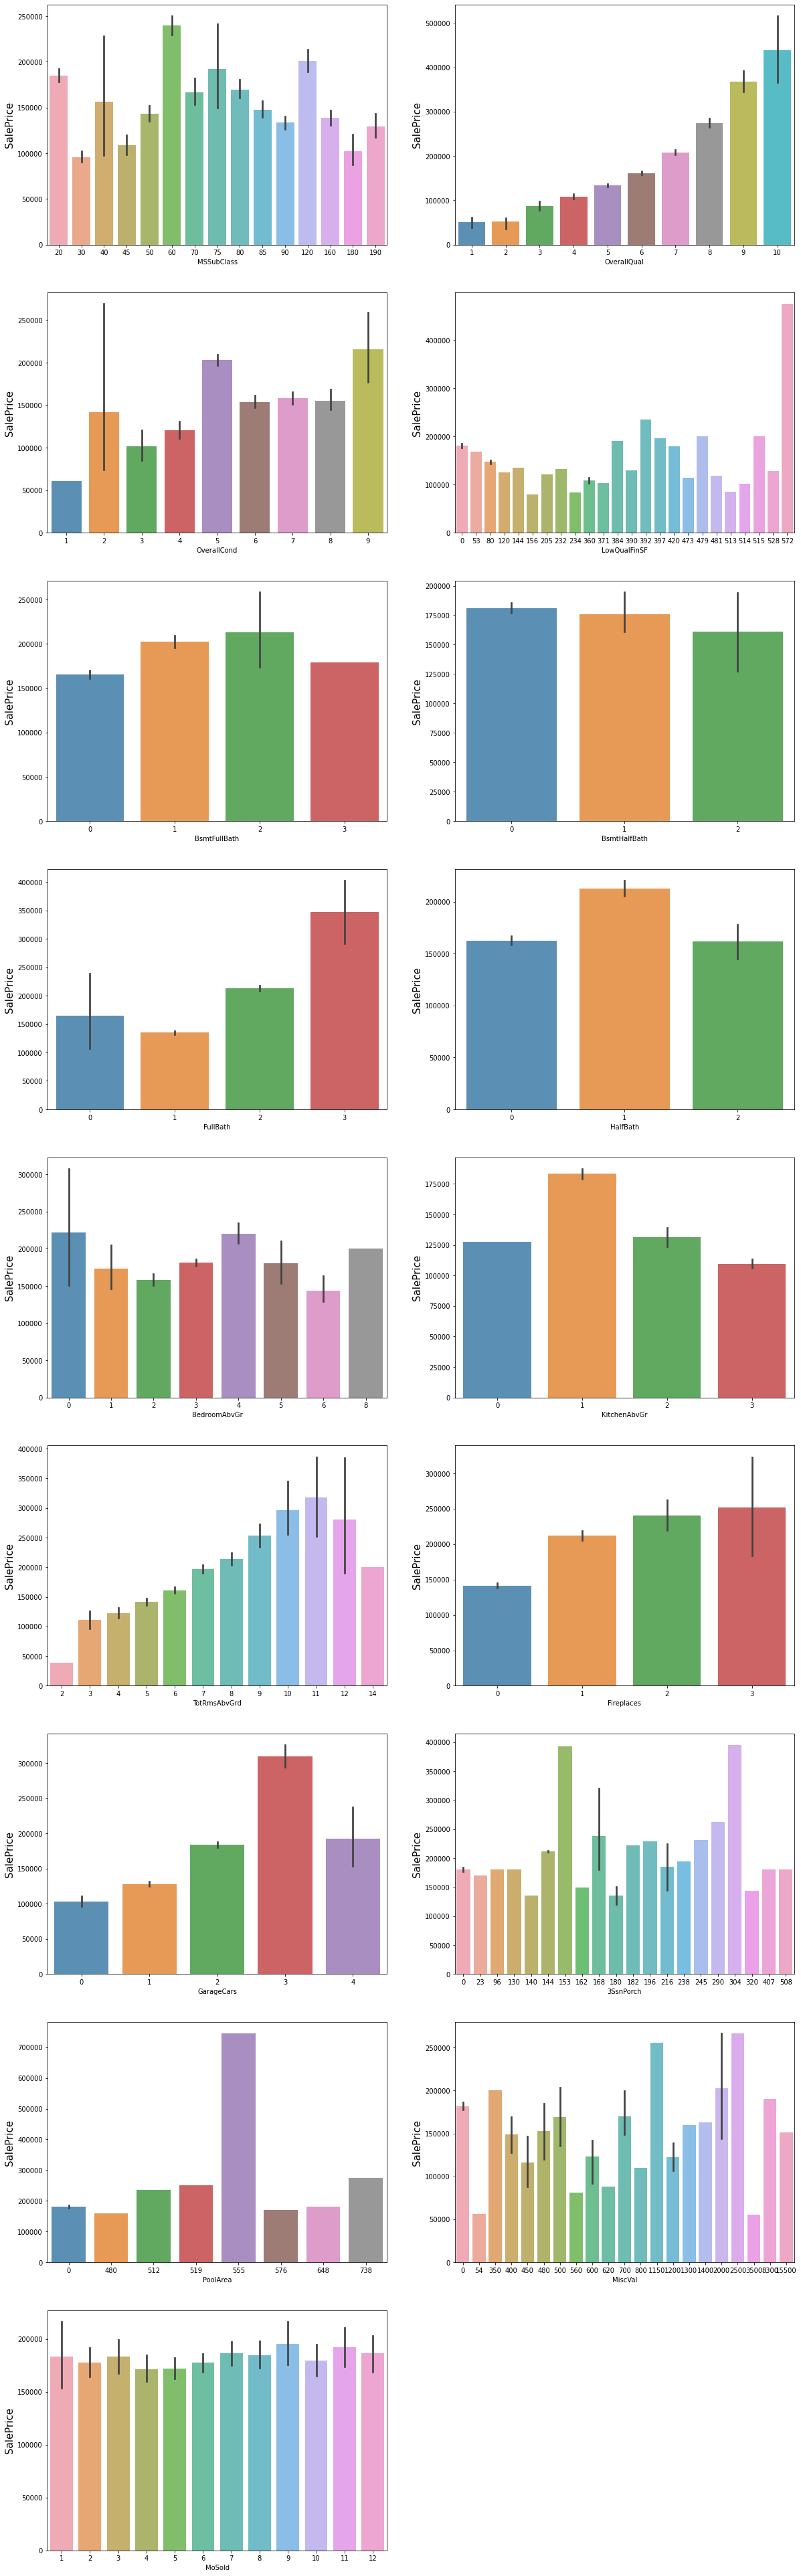

In [22]:
# Finding the relationship between discrete features and Sale Price

plt.figure(figsize=(20,70))
plotnumber = 1

for feature in discrete_feature:
    data=df.copy()
    if plotnumber<=17 :
        ax = plt.subplot(9,2,plotnumber)
        sns.barplot(x=feature, y='SalePrice', data=data, alpha=0.8)
        plt.ylabel('SalePrice', fontsize=15)
    plotnumber+=1
plt.show()

#### Insights from the plots:
1. As the Overall Quality & Overall Condition of the houses increase, the house prices also increase.
2. For Low quality finished square feet (all floors) i.e. LowQualFinSF of 572, the house prices are high.
3. As the no. of Full bathrooms above grade (FullBath) increases, so does the house prices.
4. Half bathrooms above grade (HalfBath) of 1 has higher prices.
5. For kitchen above grade of 1, house prices are higher.
6. As the total no. of rooms increases upto 11, house price increases, but for houses with rooms 12-14, the prices decrease.
7. As the no. of fire places in the house increases, house price increases.
8. As Size of garage in car capacity (GarageCars) increases upto 3, prices increase, but later on decreases as the GarageCars increase.
9. Houses with three season porch area in square feet (3SsnPorch) of 153 & 304, have relatively higher house prices compared to other values.
10. Houses with Pool area in square feet (PoolArea) of 555 has very high prices comapred to other values.
11. The month in which the houses are sold has almost no impact on the house prices.
12. Houses with BsmtFullBath of 2 has slightly higher prices than others.
13. As the BsmtHalfBath increases from 0 to 2, the house prices decrease.

In [23]:
# Continuous variables

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count: ", len(continuous_feature))
print('-'*75)
continuous_feature

Continuous feature Count:  16
---------------------------------------------------------------------------


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [24]:
df[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


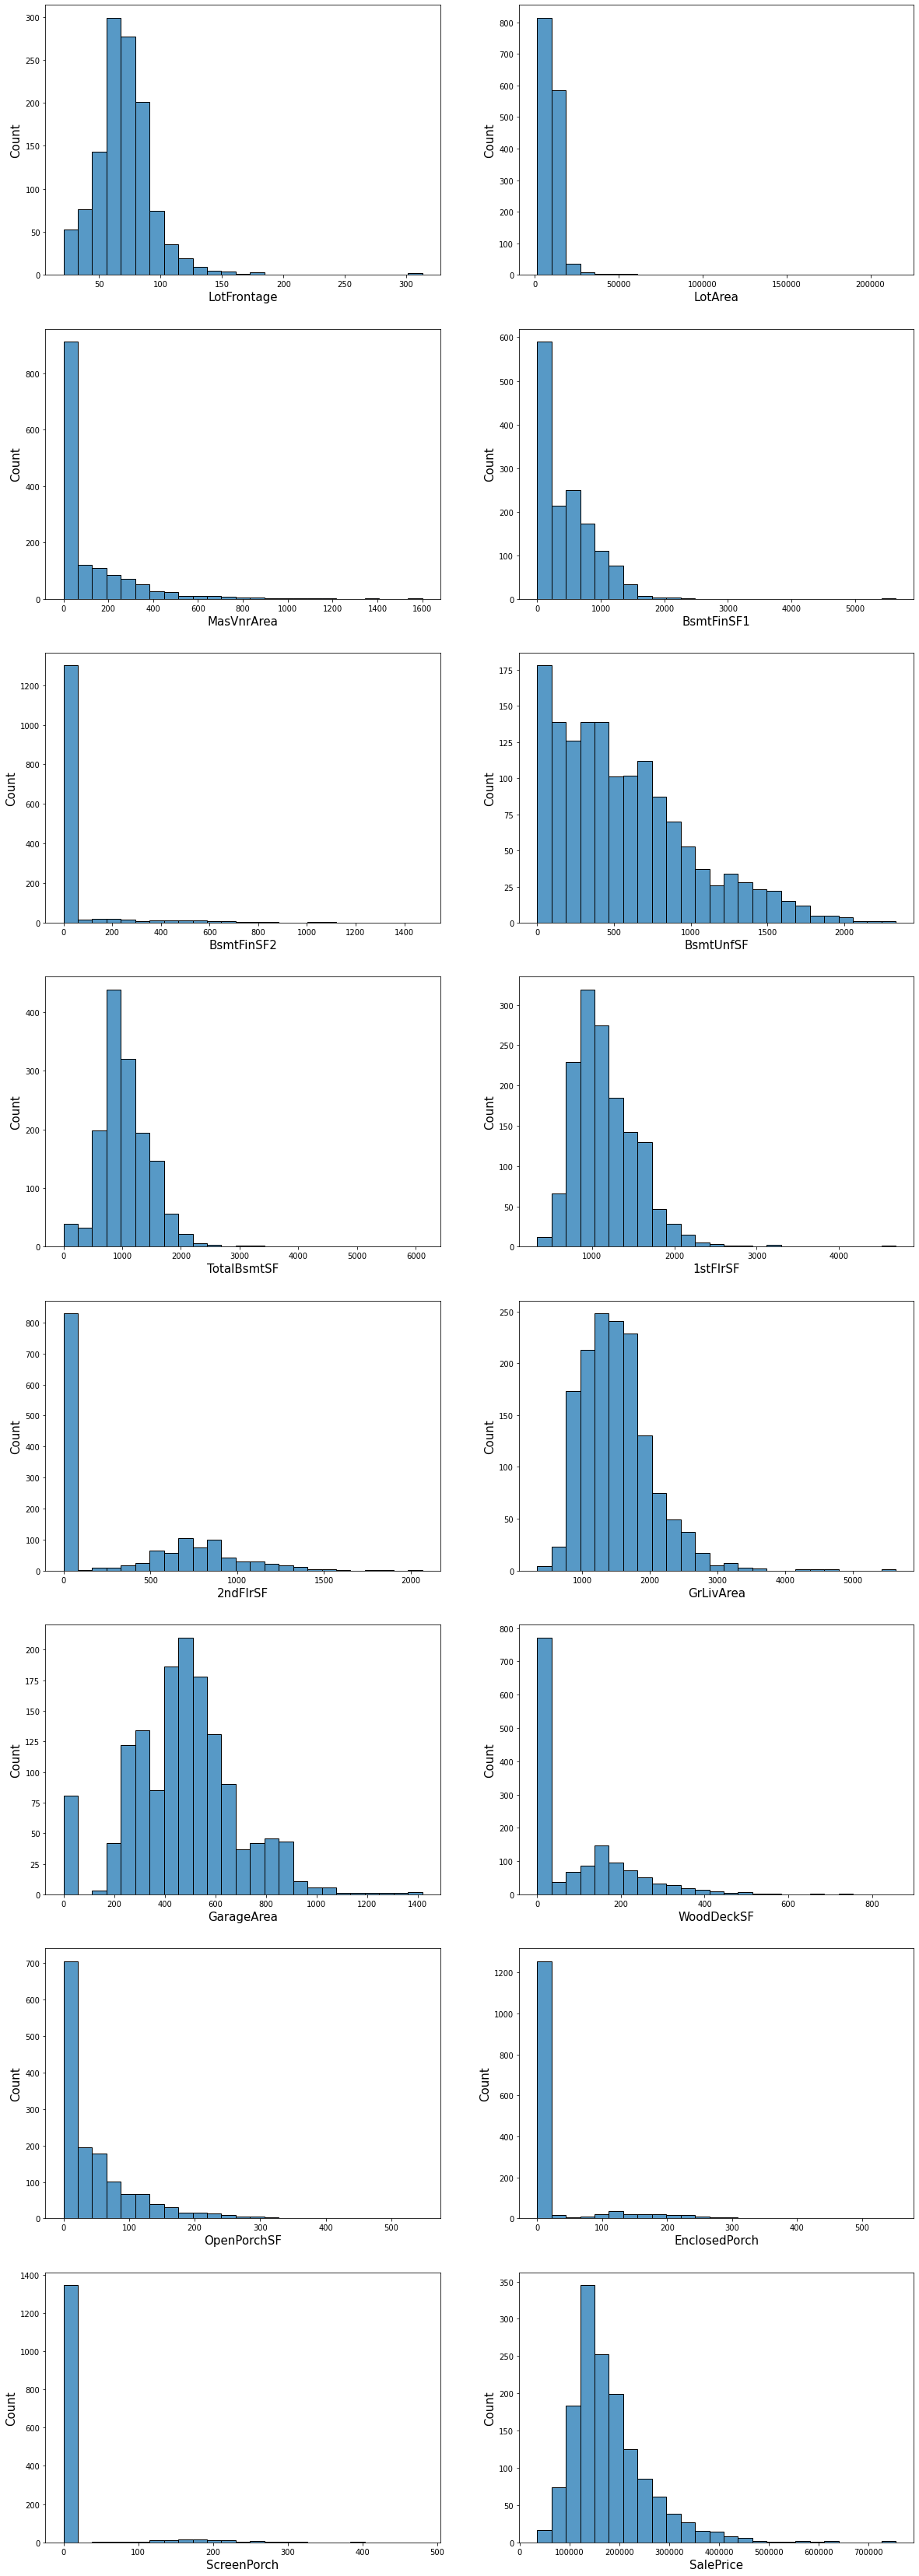

In [25]:
# Analysing the continuous values using histograms to better understand the distribution

plt.figure(figsize=(20,60))
plotnumber = 1

for feature in continuous_feature:
    data=df.copy()
    if plotnumber<=16 :
        ax = plt.subplot(8,2,plotnumber)
        sns.histplot(x=feature, data=data, bins=25)
        plt.xlabel(feature, fontsize=15)
        plt.ylabel("Count", fontsize=15)
    plotnumber+=1
plt.show()

#### Insights from the plots
LotFrontage, 1stFlrSF , GrLivArea, GarageArea & salePrice are **rightly (positively) skewed** which need to be transformed.

To make the data a normal distribution, we need to perform transformation. There are various techniques to transform data into a normal distribution such as:
1. **Logarithmic transformation**
2. **Square root transformation**
3. **Exponential transformation**
4. **Reciprocal transformation**
5. **Boxcox transformation**

Here, we'll perform **Logarithmic tranformation**.

In [26]:
# Using logarithmic transformation to transform the data to normal distribution

for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])

In [27]:
import scipy.stats as stats
import pylab

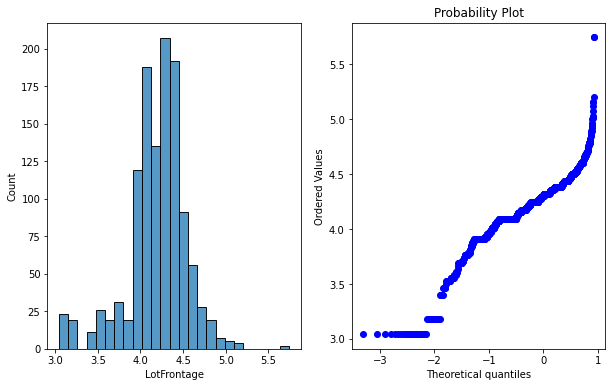

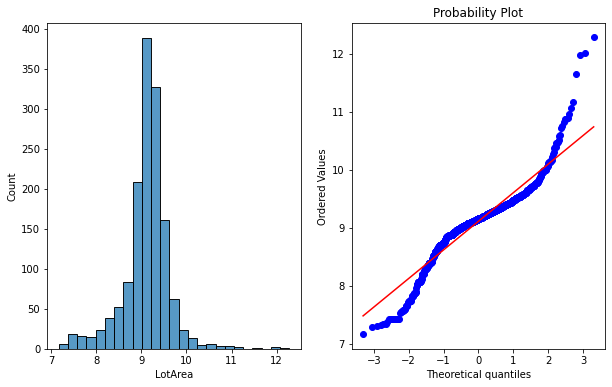

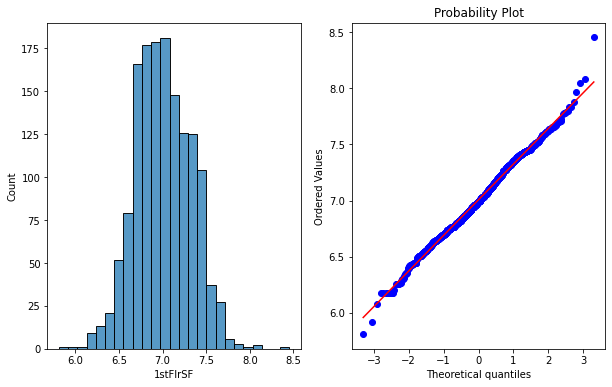

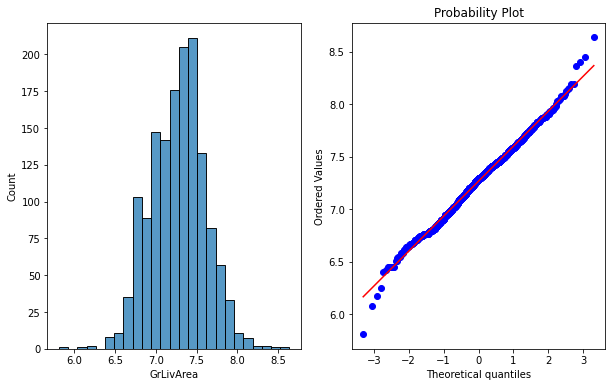

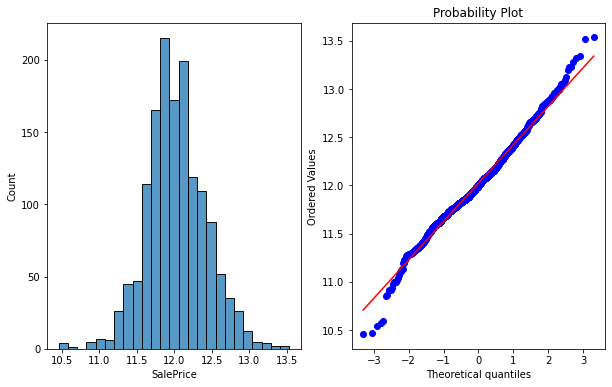

In [28]:
# Checking the distribution of variables after performing Logarithmic transformation

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        sns.histplot(x=feature, data=data, bins=25)
        plt.subplot(1,2,2)
        stats.probplot(data[feature], dist='norm', plot=pylab)
plt.show()   

### Outlier analysis

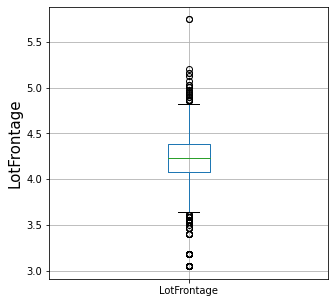

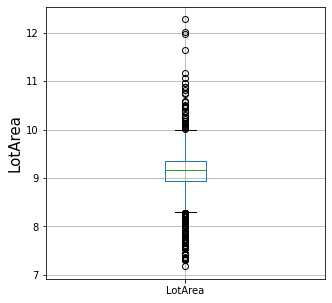

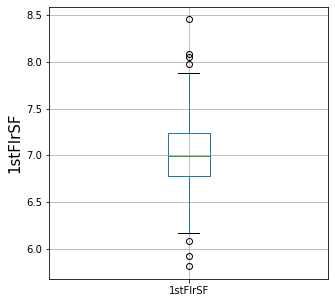

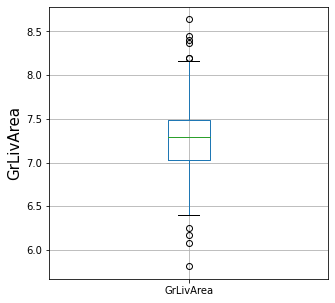

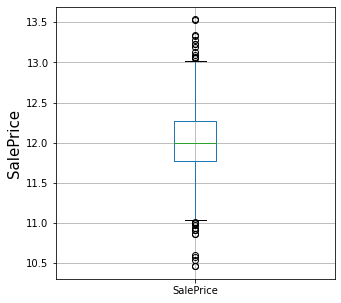

In [29]:
# checking for outliers

plotnumber = 1

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.figure(figsize=(5,5))
        data.boxplot(column=feature)
        plt.ylabel(feature, fontsize=15)
    plotnumber+=1
plt.show()

#### b) Categorical variables

In [30]:
# display categorical variables

categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
print("Categorical feature Count: ", len(categorical_features))
print("-"*75)
categorical_features

Categorical feature Count:  43
---------------------------------------------------------------------------


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [31]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [32]:
# checking for cardinality of categorical features

for feature in categorical_features:
    print('No. of categories in {} are: {}'.format(feature, len(df[feature].unique())))

No. of categories in MSZoning are: 5
No. of categories in Street are: 2
No. of categories in Alley are: 3
No. of categories in LotShape are: 4
No. of categories in LandContour are: 4
No. of categories in Utilities are: 2
No. of categories in LotConfig are: 5
No. of categories in LandSlope are: 3
No. of categories in Neighborhood are: 25
No. of categories in Condition1 are: 9
No. of categories in Condition2 are: 8
No. of categories in BldgType are: 5
No. of categories in HouseStyle are: 8
No. of categories in RoofStyle are: 6
No. of categories in RoofMatl are: 8
No. of categories in Exterior1st are: 15
No. of categories in Exterior2nd are: 16
No. of categories in MasVnrType are: 5
No. of categories in ExterQual are: 4
No. of categories in ExterCond are: 5
No. of categories in Foundation are: 6
No. of categories in BsmtQual are: 5
No. of categories in BsmtCond are: 5
No. of categories in BsmtExposure are: 5
No. of categories in BsmtFinType1 are: 7
No. of categories in BsmtFinType2 are: 7

1. We need to convert these categorical features into numeric for the model to be able to understand the data. This can be done using different encoding techniques.
2. There are different techniques to convert categorical data to numeric such as: label encoding, dummy encoding, one hot encoding, frequency encoding, target guided ordinal encoding, mean encoding, etc.
3. As there are many features & each feature has many categories, one hot encoding is not a good way to handle categorical values, hence some other method needs to be used.
4. Also, for all these features, it's not possible to perform simple ordinal encoding as we don't know the order of the categories for all features.
5. Whereas we can perform **Target guided Ordinal encoding** for this data which we'll perform in the feature engineering section.

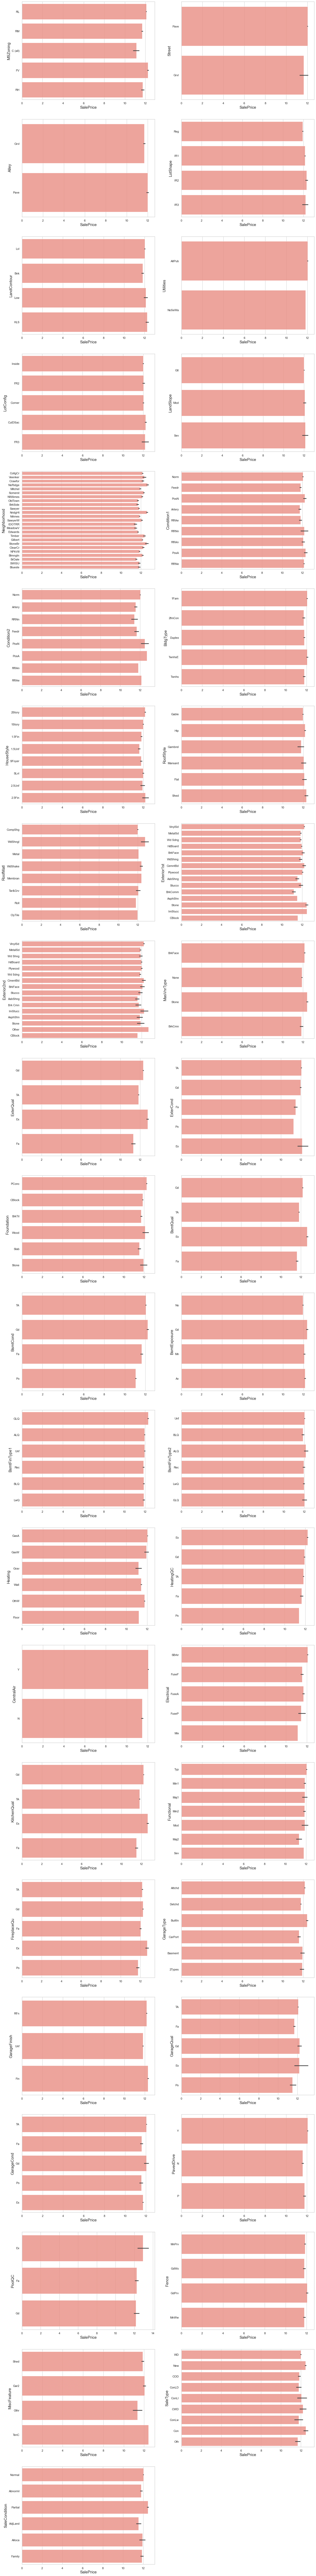

In [33]:
# Analyzing the relationship of categorical variables with SalePrice

plt.figure(figsize=(20,180))
plotnumber = 1
sns.set(style='whitegrid')

for feature in categorical_features:
    if plotnumber<=43:
        ax = plt.subplot(22,2,plotnumber)
        data=df.copy()
        sns.barplot(x='SalePrice', y=feature, data=data, alpha=0.8, color='salmon')
        plt.xlabel('SalePrice', fontsize=15)
        plt.ylabel(feature, fontsize=15)
    plotnumber+=1
plt.show()

In [34]:
# function to Check unique values in each categorical feature

def get_categorical_uniques(df):
    categorical_columns = [column for column in df.dtypes.index if df.dtypes[column] == 'object'] 
    categorical_uniques = {column: df[column].unique() for column in categorical_columns}
    
    return categorical_uniques

## Train Test split

In [35]:
# Remember there will always be a chance of data leakage so we need to split the data first and then apply feature Engineering

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1, random_state=50)

In [36]:
print('train: ', train.shape)
print('test: ', test.shape)

train:  (1314, 81)
test:  (146, 81)


## Train data preprocessing

In [37]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
179,180,30,RM,4.094345,9.050172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,6.875232,0,0,6.875232,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,11.512925
86,87,60,RL,4.804021,9.385218,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,684,684,GasA,Ex,Y,SBrkr,6.527958,876,0,7.352441,0,0,2,1,3,1,Gd,6,Typ,1,Gd,BuiltIn,2005.0,Fin,2,400,TA,TA,Y,100,38,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,12.066811
246,247,190,RM,4.234107,9.120634,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,6.811244,1020,0,7.564238,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,11.827736
238,239,20,RL,4.532599,9.395159,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,254.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1694,1694,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,818,TA,TA,Y,168,228,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,Partial,12.669807
1208,1209,20,RL,4.248495,8.957124,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1962,1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,504,BLQ,108,319,931,GasA,TA,Y,SBrkr,7.156956,0,0,7.156956,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1980.0,Unf,2,506,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,11.849398


In [38]:
train_data = train.copy()

In [39]:
train_nan_features = [feature for feature in train_data if train_data[feature].isnull().sum()>=1]
print('No. of features with nan values in train data: ', len(train_nan_features))
print("-"*75)

for feature in train_nan_features:
    print(feature+': ', train_data[feature].isnull().mean().round(4), '%')

No. of features with nan values in train data:  19
---------------------------------------------------------------------------
LotFrontage:  0.1743 %
Alley:  0.9346 %
MasVnrType:  0.0046 %
MasVnrArea:  0.0046 %
BsmtQual:  0.0244 %
BsmtCond:  0.0244 %
BsmtExposure:  0.0251 %
BsmtFinType1:  0.0244 %
BsmtFinType2:  0.0251 %
Electrical:  0.0008 %
FireplaceQu:  0.4772 %
GarageType:  0.0586 %
GarageYrBlt:  0.0586 %
GarageFinish:  0.0586 %
GarageQual:  0.0586 %
GarageCond:  0.0586 %
PoolQC:  0.9954 %
Fence:  0.809 %
MiscFeature:  0.9604 %


In [40]:
# Dropping unecessary features from EDA
## 'Alley', 'MiscFeature', 'Fence' & 'PoolQC' have more than 80% of missing values, hence can be dropped.
## 'Id' has all unique values, hence can be dropped.

train_data.drop(['Id', 'Alley', 'MiscFeature', 'Fence', 'PoolQC'], axis=1, inplace=True)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
179,30,RM,4.094345,9.050172,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,6.875232,0,0,6.875232,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD,Normal,11.512925
86,60,RL,4.804021,9.385218,Pave,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,684,684,GasA,Ex,Y,SBrkr,6.527958,876,0,7.352441,0,0,2,1,3,1,Gd,6,Typ,1,Gd,BuiltIn,2005.0,Fin,2,400,TA,TA,Y,100,38,0,0,0,0,0,3,2009,WD,Normal,12.066811
246,190,RM,4.234107,9.120634,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,6.811244,1020,0,7.564238,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD,Normal,11.827736
238,20,RL,4.532599,9.395159,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,254.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1694,1694,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,818,TA,TA,Y,168,228,0,0,0,0,0,12,2007,New,Partial,12.669807
1208,20,RL,4.248495,8.957124,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1962,1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,504,BLQ,108,319,931,GasA,TA,Y,SBrkr,7.156956,0,0,7.156956,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1980.0,Unf,2,506,TA,TA,Y,0,0,0,0,0,0,0,10,2008,WD,Normal,11.849398


In [41]:
train_nan_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [42]:
train_nan_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'MasVnrType', 'BsmtQual', 'BsmtCond', 
                      'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 
                      'GarageFinish', 'GarageQual', 'GarageCond']

In [43]:
print('No. of features in train data with null values that need imputation: ', len(train_nan_features))
print("-"*75)
train_nan_features

No. of features in train data with null values that need imputation:  15
---------------------------------------------------------------------------


['LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

These above features have less number of missing values, hence we can perform **missing value imputation**.

In [44]:
# checking no. of numerical features with nan values in train data that need imputation

train_NumFeatures_nan = [feature for feature in train_nan_features if train_data[feature].dtypes != 'object']
print('Number of numerical variables with nan values: ', len(train_NumFeatures_nan))
print("-"*75)
train_NumFeatures_nan

Number of numerical variables with nan values:  3
---------------------------------------------------------------------------


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [45]:
# checking no. of categorical features with nan values in train data that need imputation

train_CatFeatures_nan = [feature for feature in train_nan_features if train_data[feature].dtypes=='object']
print("Number of categorical variables with nan values: ", len(train_CatFeatures_nan))
print("-"*75)
train_CatFeatures_nan

Number of categorical variables with nan values:  12
---------------------------------------------------------------------------


['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

### Missing values imputation in train data
1. For **numerical** features: **median** imputation
2. For **categorical** features: **mode** imputation

In [46]:
# Median imputation for numerical features:

def impute_numerical(df,feature):
    df[feature] = df[feature].fillna(df[feature].median())
    return df
train_data = impute_numerical(train_data,train_NumFeatures_nan)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
179,30,RM,4.094345,9.050172,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,6.875232,0,0,6.875232,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD,Normal,11.512925
86,60,RL,4.804021,9.385218,Pave,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,684,684,GasA,Ex,Y,SBrkr,6.527958,876,0,7.352441,0,0,2,1,3,1,Gd,6,Typ,1,Gd,BuiltIn,2005.0,Fin,2,400,TA,TA,Y,100,38,0,0,0,0,0,3,2009,WD,Normal,12.066811
246,190,RM,4.234107,9.120634,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,6.811244,1020,0,7.564238,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD,Normal,11.827736
238,20,RL,4.532599,9.395159,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,254.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1694,1694,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,818,TA,TA,Y,168,228,0,0,0,0,0,12,2007,New,Partial,12.669807
1208,20,RL,4.248495,8.957124,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1962,1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,504,BLQ,108,319,931,GasA,TA,Y,SBrkr,7.156956,0,0,7.156956,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1980.0,Unf,2,506,TA,TA,Y,0,0,0,0,0,0,0,10,2008,WD,Normal,11.849398


In [47]:
print('Frequent occurrences of categorical feature with nan values')
print("-"*75)
for feature in train_CatFeatures_nan:
    mode_values = train_data[feature].mode()[0]
    print(feature+':', mode_values)

Frequent occurrences of categorical feature with nan values
---------------------------------------------------------------------------
MasVnrType: None
BsmtQual: TA
BsmtCond: TA
BsmtExposure: No
BsmtFinType1: Unf
BsmtFinType2: Unf
Electrical: SBrkr
FireplaceQu: Gd
GarageType: Attchd
GarageFinish: Unf
GarageQual: TA
GarageCond: TA


In [48]:
# Mode imputation for categorical features:

for feature in train_CatFeatures_nan:
    train_data[feature] = train_data[feature].fillna(train_data[feature].mode()[0])
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
179,30,RM,4.094345,9.050172,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,6.875232,0,0,6.875232,0,0,1,0,2,1,TA,5,Typ,0,Gd,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD,Normal,11.512925
86,60,RL,4.804021,9.385218,Pave,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,684,684,GasA,Ex,Y,SBrkr,6.527958,876,0,7.352441,0,0,2,1,3,1,Gd,6,Typ,1,Gd,BuiltIn,2005.0,Fin,2,400,TA,TA,Y,100,38,0,0,0,0,0,3,2009,WD,Normal,12.066811
246,190,RM,4.234107,9.120634,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,6.811244,1020,0,7.564238,0,0,2,0,4,2,Fa,9,Typ,0,Gd,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD,Normal,11.827736
238,20,RL,4.532599,9.395159,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,254.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1694,1694,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,0,0,2,0,3,1,Gd,7,Typ,0,Gd,Attchd,2007.0,Fin,3,818,TA,TA,Y,168,228,0,0,0,0,0,12,2007,New,Partial,12.669807
1208,20,RL,4.248495,8.957124,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1962,1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,504,BLQ,108,319,931,GasA,TA,Y,SBrkr,7.156956,0,0,7.156956,1,0,1,0,3,1,TA,6,Typ,0,Gd,Detchd,1980.0,Unf,2,506,TA,TA,Y,0,0,0,0,0,0,0,10,2008,WD,Normal,11.849398


In [49]:
train_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

### Handling Outliers in train data

In [50]:
# Handling outliers by capping technique

def IQR_capping(df, feature, factor):
    
    for feature in train_data.columns:
        if df[feature].dtypes != 'object':
            
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
        
            IQR = Q3 - Q1
        
            upper_bound = Q3 + (factor*IQR)
            lower_bound = Q1 - (factor*IQR)
        
            df[feature] = np.where(df[feature]>upper_bound, upper_bound,
                          np.where(df[feature]<lower_bound, lower_bound, 
                          df[feature]))

IQR_capping(train_data, feature, 1.5)

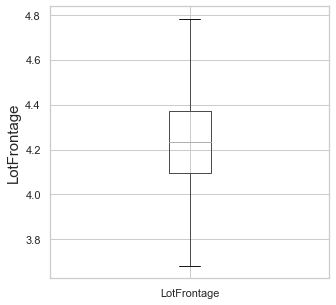

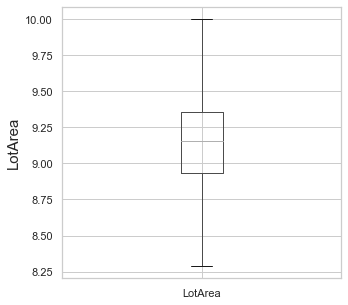

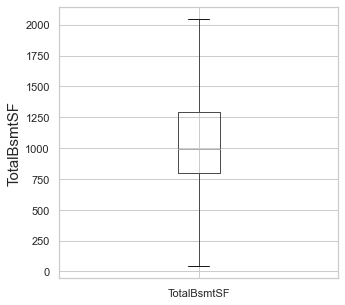

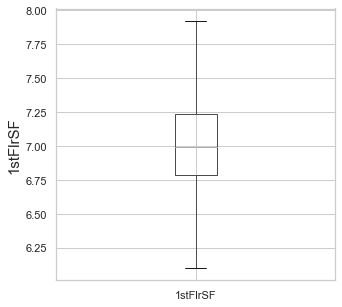

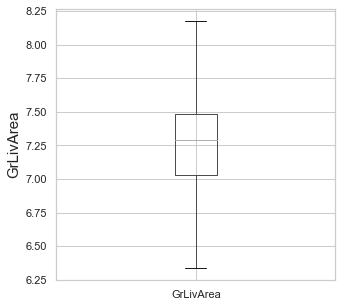

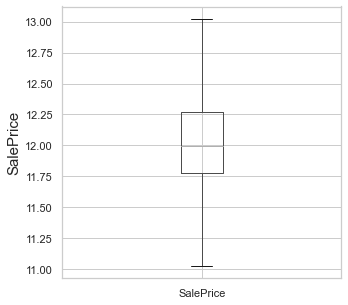

In [51]:
# checking for distribution of continuous features after handling outlier effect

plotnumber = 1

for feature in continuous_feature:
    data=train_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.figure(figsize=(5,5))
        data.boxplot(column=feature)
        plt.ylabel(feature, fontsize=15)
    plotnumber+=1
plt.show()

Here, we're capping outliers at those percentiles. Thus, we're not losing rows, but also have removed outlier effects to certain extent.

### Handling Categorical features in train data

In [52]:
train_Cat_features = get_categorical_uniques(train_data)
train_Cat_features

{'MSZoning': array(['RM', 'RL', 'FV', 'C (all)', 'RH'], dtype=object),
 'Street': array(['Pave', 'Grvl'], dtype=object),
 'LotShape': array(['Reg', 'IR2', 'IR1', 'IR3'], dtype=object),
 'LandContour': array(['Lvl', 'Low', 'Bnk', 'HLS'], dtype=object),
 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object),
 'LotConfig': array(['Inside', 'Corner', 'FR2', 'CulDSac', 'FR3'], dtype=object),
 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 'Neighborhood': array(['OldTown', 'Gilbert', 'NridgHt', 'NAmes', 'NPkVill', 'SawyerW',
        'Veenker', 'IDOTRR', 'Mitchel', 'Edwards', 'Sawyer', 'NoRidge',
        'Somerst', 'SWISU', 'CollgCr', 'BrDale', 'NWAmes', 'BrkSide',
        'StoneBr', 'Crawfor', 'ClearCr', 'Timber', 'MeadowV', 'Blmngtn',
        'Blueste'], dtype=object),
 'Condition1': array(['Norm', 'Feedr', 'PosA', 'PosN', 'Artery', 'RRAn', 'RRNe', 'RRNn',
        'RRAe'], dtype=object),
 'Condition2': array(['Norm', 'Feedr', 'RRNn', 'PosN', 'RRAn', 'Artery', 'RRAe', 'PosA'],
  

In [53]:
len(train_Cat_features)

39

Here, we'll be performing **Target guided Ordinal encoding**.

#### Target guided Ordinal encoding on train data

In [54]:
# Encoding categorical variables

for feature in train_Cat_features:
    labels_ordered = train_data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered, 0)}
    train_data[feature] = train_data[feature].map(labels_ordered)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
179,30.0,1,4.094345,9.050172,1,0,1,1,0,0,4,3,4,3,4,5.0,6.0,1923.0,2006.0,1,2,5,5,1,0.0,2,3,2,1,2,0,3,0.0,3,0.0,968.000,968.0,4,2,1,4,6.875232,0.0,0.0,6.875232,0.0,0.0,1.0,0.0,2.0,1.0,1,5.0,6,0.0,1,1,1935.0,0,2.0,480.0,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0,4,4,11.512925
86,60.0,3,4.782103,9.385218,1,2,1,1,0,0,14,3,4,3,7,6.0,5.0,2005.0,2005.0,1,2,12,14,1,0.0,2,3,5,2,2,2,3,0.0,3,0.0,684.000,684.0,4,4,1,4,6.527958,876.0,0.0,7.352441,0.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,1,5,2005.0,2,2.0,400.0,3,4,2,100.0,38.0,0.0,0.0,0.0,0.0,0.0,3.0,2009.0,4,4,12.066811
246,145.0,1,4.234107,9.120634,1,0,1,1,0,0,4,3,4,0,7,6.0,7.5,1910.0,1950.0,1,2,3,1,1,0.0,1,1,3,0,2,0,3,0.0,3,0.0,1020.000,1020.0,4,3,0,1,6.811244,1020.0,0.0,7.564238,0.0,0.0,2.0,0.0,4.0,1.0,0,9.0,6,0.0,1,1,1910.0,0,1.0,440.0,0,0,2,0.0,60.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,4,4,11.827736
238,20.0,3,4.532599,9.395159,1,0,1,1,0,0,23,3,4,3,4,8.0,5.0,2007.0,2007.0,5,2,12,14,2,254.0,3,3,5,3,2,0,3,0.0,3,0.0,1688.625,1694.0,4,4,1,4,7.434848,0.0,0.0,7.434848,0.0,0.0,2.0,0.0,3.0,1.0,2,7.0,6,0.0,1,4,2007.0,2,3.0,818.0,3,4,2,168.0,170.0,0.0,0.0,0.0,0.0,0.0,12.0,2007.0,7,5,12.669807
1208,20.0,3,4.248495,8.957124,1,0,1,1,0,0,9,3,4,3,4,5.0,7.0,1962.0,1980.0,1,2,6,4,1,0.0,1,2,2,1,2,0,0,504.0,0,0.0,319.000,931.0,4,2,1,4,7.156956,0.0,0.0,7.156956,1.0,0.0,1.0,0.0,3.0,1.0,1,6.0,6,0.0,1,1,1980.0,0,2.0,506.0,3,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2008.0,4,4,11.849398


We have all the transformations & feature engineering on the training data. Now, we need to apply the same feature engineering steps to the test data.

# Test data preprocessing
Applying the same transformations to test data as applied to train data

In [55]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
930,931,20,RL,4.290459,9.096612,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1450,1466,GasA,Ex,Y,SBrkr,7.290293,0,0,7.290293,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,610,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,12.211060
530,531,80,RL,4.442651,9.230143,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,5,1988,1989,Gable,CompShg,HdBoard,HdBoard,BrkFace,219.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,783,Unf,0,678,1461,GasA,Ex,Y,SBrkr,7.319202,0,0,7.319202,1,0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1988.0,RFn,2,600,TA,TA,Y,224,0,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Abnorml,12.072541
1291,1292,160,RM,3.044522,7.426549,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,5,7,1972,1972,Gable,CompShg,CemntBd,CmentBd,BrkFace,268.0,TA,TA,CBlock,TA,TA,No,ALQ,231,Unf,0,399,630,GasA,TA,Y,SBrkr,6.445720,672,0,7.171657,0,0,2,1,3,1,TA,6,Typ,0,NaN,Detchd,1972.0,Unf,1,264,TA,TA,Y,185,0,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,11.691072
1385,1386,50,RM,3.688879,8.600799,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,8,1922,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,BrkTil,TA,TA,No,BLQ,735,Unf,0,61,796,GasA,Gd,Y,SBrkr,6.679599,358,0,7.050989,1,0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,1922.0,Unf,1,240,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,11.740061
305,306,20,RL,4.382027,9.248214,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,Stone,246.0,Gd,TA,PConc,Gd,TA,No,GLQ,1464,Unf,0,536,2000,GasA,Ex,Y,SBrkr,7.600902,0,0,7.600902,1,0,2,0,3,1,Gd,8,Typ,0,NaN,Attchd,2004.0,Fin,3,888,TA,TA,Y,168,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,12.631014


In [56]:
test_data = test.copy()

In [57]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [58]:
# checking for null values in test data:

test_nan_features = [feature for feature in test_data.columns if test_data[feature].isnull().sum()>=1]
print('No. of features with nan values in test data: ', len(test_nan_features))
print('-'*75)

for feature in test_nan_features:
    print(feature+': ', test_data[feature].isnull().mean().round(4), '%')

No. of features with nan values in test data:  18
---------------------------------------------------------------------------
LotFrontage:  0.2055 %
Alley:  0.9658 %
MasVnrType:  0.0137 %
MasVnrArea:  0.0137 %
BsmtQual:  0.0342 %
BsmtCond:  0.0342 %
BsmtExposure:  0.0342 %
BsmtFinType1:  0.0342 %
BsmtFinType2:  0.0342 %
FireplaceQu:  0.4315 %
GarageType:  0.0274 %
GarageYrBlt:  0.0274 %
GarageFinish:  0.0274 %
GarageQual:  0.0274 %
GarageCond:  0.0274 %
PoolQC:  0.9932 %
Fence:  0.7945 %
MiscFeature:  0.9863 %


In [59]:
# Dropping unecessary features from EDA (same as train_data):

test_data.drop(['Id', 'Alley', 'MiscFeature', 'Fence', 'PoolQC'], axis=1, inplace=True)
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
930,20,RL,4.290459,9.096612,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1450,1466,GasA,Ex,Y,SBrkr,7.290293,0,0,7.290293,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,610,TA,TA,Y,100,18,0,0,0,0,0,7,2009,WD,Normal,12.211060
530,80,RL,4.442651,9.230143,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,5,1988,1989,Gable,CompShg,HdBoard,HdBoard,BrkFace,219.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,783,Unf,0,678,1461,GasA,Ex,Y,SBrkr,7.319202,0,0,7.319202,1,0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1988.0,RFn,2,600,TA,TA,Y,224,0,0,0,0,0,0,8,2008,WD,Abnorml,12.072541
1291,160,RM,3.044522,7.426549,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,5,7,1972,1972,Gable,CompShg,CemntBd,CmentBd,BrkFace,268.0,TA,TA,CBlock,TA,TA,No,ALQ,231,Unf,0,399,630,GasA,TA,Y,SBrkr,6.445720,672,0,7.171657,0,0,2,1,3,1,TA,6,Typ,0,NaN,Detchd,1972.0,Unf,1,264,TA,TA,Y,185,0,0,0,0,0,0,2,2009,WD,Normal,11.691072
1385,50,RM,3.688879,8.600799,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,8,1922,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,BrkTil,TA,TA,No,BLQ,735,Unf,0,61,796,GasA,Gd,Y,SBrkr,6.679599,358,0,7.050989,1,0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,1922.0,Unf,1,240,TA,TA,N,0,96,0,0,0,0,0,5,2010,WD,Normal,11.740061
305,20,RL,4.382027,9.248214,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,Stone,246.0,Gd,TA,PConc,Gd,TA,No,GLQ,1464,Unf,0,536,2000,GasA,Ex,Y,SBrkr,7.600902,0,0,7.600902,1,0,2,0,3,1,Gd,8,Typ,0,NaN,Attchd,2004.0,Fin,3,888,TA,TA,Y,168,0,0,0,0,0,0,7,2007,WD,Normal,12.631014


In [60]:
test_nan_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [61]:
test_nan_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'MasVnrType', 'BsmtQual', 'BsmtCond', 
                     'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
                     'GarageFinish', 'GarageQual', 'GarageCond']

In [62]:
print('No. of features in test data with null values that need imputation: ', len(test_nan_features))
print("-"*75)
test_nan_features

No. of features in test data with null values that need imputation:  14
---------------------------------------------------------------------------


['LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [63]:
# checking no. of numerical features with nan values in test data:

test_NumFeatures_nan = [feature for feature in test_nan_features if test_data[feature].dtypes != 'object']
print('Number of numerical variables with nan values: ', len(test_NumFeatures_nan))
print('-'*75)
test_NumFeatures_nan

Number of numerical variables with nan values:  3
---------------------------------------------------------------------------


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [64]:
# checking no. of categorical features with nan values in test data:

test_CatFeatures_nan = [feature for feature in test_nan_features if test_data[feature].dtypes=='object']
print("Number of categorical variables with nan values: ", len(test_CatFeatures_nan))
print('-'*75)
test_CatFeatures_nan

Number of categorical variables with nan values:  11
---------------------------------------------------------------------------


['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

### Missing value imputation in test data

In [65]:
# Median imputation for numerical features

test_data = impute_numerical(test_data,test_NumFeatures_nan)
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
930,20,RL,4.290459,9.096612,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1450,1466,GasA,Ex,Y,SBrkr,7.290293,0,0,7.290293,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,610,TA,TA,Y,100,18,0,0,0,0,0,7,2009,WD,Normal,12.211060
530,80,RL,4.442651,9.230143,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,5,1988,1989,Gable,CompShg,HdBoard,HdBoard,BrkFace,219.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,783,Unf,0,678,1461,GasA,Ex,Y,SBrkr,7.319202,0,0,7.319202,1,0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1988.0,RFn,2,600,TA,TA,Y,224,0,0,0,0,0,0,8,2008,WD,Abnorml,12.072541
1291,160,RM,3.044522,7.426549,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,5,7,1972,1972,Gable,CompShg,CemntBd,CmentBd,BrkFace,268.0,TA,TA,CBlock,TA,TA,No,ALQ,231,Unf,0,399,630,GasA,TA,Y,SBrkr,6.445720,672,0,7.171657,0,0,2,1,3,1,TA,6,Typ,0,NaN,Detchd,1972.0,Unf,1,264,TA,TA,Y,185,0,0,0,0,0,0,2,2009,WD,Normal,11.691072
1385,50,RM,3.688879,8.600799,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,8,1922,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,BrkTil,TA,TA,No,BLQ,735,Unf,0,61,796,GasA,Gd,Y,SBrkr,6.679599,358,0,7.050989,1,0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,1922.0,Unf,1,240,TA,TA,N,0,96,0,0,0,0,0,5,2010,WD,Normal,11.740061
305,20,RL,4.382027,9.248214,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,Stone,246.0,Gd,TA,PConc,Gd,TA,No,GLQ,1464,Unf,0,536,2000,GasA,Ex,Y,SBrkr,7.600902,0,0,7.600902,1,0,2,0,3,1,Gd,8,Typ,0,NaN,Attchd,2004.0,Fin,3,888,TA,TA,Y,168,0,0,0,0,0,0,7,2007,WD,Normal,12.631014


In [66]:
print('Frequent occurrences of categorical feature with nan values')
print("-"*75)
for feature in test_CatFeatures_nan:
    mode_values = test_data[feature].mode()[0]
    print(feature+':', mode_values)

Frequent occurrences of categorical feature with nan values
---------------------------------------------------------------------------
MasVnrType: None
BsmtQual: Gd
BsmtCond: TA
BsmtExposure: No
BsmtFinType1: GLQ
BsmtFinType2: Unf
FireplaceQu: TA
GarageType: Attchd
GarageFinish: Unf
GarageQual: TA
GarageCond: TA


In [67]:
# Mode imputation for categorical features:

for feature in test_CatFeatures_nan:
    test_data[feature] = test_data[feature].fillna(test_data[feature].mode()[0])
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
930,20,RL,4.290459,9.096612,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1450,1466,GasA,Ex,Y,SBrkr,7.290293,0,0,7.290293,0,0,2,0,3,1,Gd,7,Typ,0,TA,Attchd,2007.0,Fin,3,610,TA,TA,Y,100,18,0,0,0,0,0,7,2009,WD,Normal,12.211060
530,80,RL,4.442651,9.230143,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,5,1988,1989,Gable,CompShg,HdBoard,HdBoard,BrkFace,219.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,783,Unf,0,678,1461,GasA,Ex,Y,SBrkr,7.319202,0,0,7.319202,1,0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1988.0,RFn,2,600,TA,TA,Y,224,0,0,0,0,0,0,8,2008,WD,Abnorml,12.072541
1291,160,RM,3.044522,7.426549,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,5,7,1972,1972,Gable,CompShg,CemntBd,CmentBd,BrkFace,268.0,TA,TA,CBlock,TA,TA,No,ALQ,231,Unf,0,399,630,GasA,TA,Y,SBrkr,6.445720,672,0,7.171657,0,0,2,1,3,1,TA,6,Typ,0,TA,Detchd,1972.0,Unf,1,264,TA,TA,Y,185,0,0,0,0,0,0,2,2009,WD,Normal,11.691072
1385,50,RM,3.688879,8.600799,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,8,1922,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,BrkTil,TA,TA,No,BLQ,735,Unf,0,61,796,GasA,Gd,Y,SBrkr,6.679599,358,0,7.050989,1,0,1,0,3,1,Gd,7,Typ,0,TA,Detchd,1922.0,Unf,1,240,TA,TA,N,0,96,0,0,0,0,0,5,2010,WD,Normal,11.740061
305,20,RL,4.382027,9.248214,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,Stone,246.0,Gd,TA,PConc,Gd,TA,No,GLQ,1464,Unf,0,536,2000,GasA,Ex,Y,SBrkr,7.600902,0,0,7.600902,1,0,2,0,3,1,Gd,8,Typ,0,TA,Attchd,2004.0,Fin,3,888,TA,TA,Y,168,0,0,0,0,0,0,7,2007,WD,Normal,12.631014


In [68]:
test_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

### Handling Outliers in test data

In [69]:
# Removing outlier effect:

IQR_capping(test_data, feature, 1.5)

### Handling Categorical variables in test data

In [70]:
# Categorical features in test data:

test_Cat_features = get_categorical_uniques(test_data)
test_Cat_features

{'MSZoning': array(['RL', 'RM', 'FV', 'C (all)'], dtype=object),
 'Street': array(['Pave'], dtype=object),
 'LotShape': array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object),
 'LandContour': array(['HLS', 'Lvl', 'Bnk', 'Low'], dtype=object),
 'Utilities': array(['AllPub'], dtype=object),
 'LotConfig': array(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], dtype=object),
 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 'Neighborhood': array(['Timber', 'BrDale', 'IDOTRR', 'CollgCr', 'Sawyer', 'NWAmes',
        'NAmes', 'BrkSide', 'Somerst', 'SWISU', 'NridgHt', 'Mitchel',
        'ClearCr', 'OldTown', 'Edwards', 'SawyerW', 'NoRidge', 'Gilbert',
        'Crawfor', 'MeadowV', 'NPkVill', 'Blmngtn', 'Blueste', 'StoneBr',
        'Veenker'], dtype=object),
 'Condition1': array(['Norm', 'Artery', 'Feedr', 'RRAn', 'RRAe', 'PosN'], dtype=object),
 'Condition2': array(['Norm', 'Artery'], dtype=object),
 'BldgType': array(['1Fam', 'Twnhs', 'TwnhsE', 'Duplex', '2fmCon'], dtype=object),
 'HouseSt

#### Target guided Ordinal encoding on test data

In [71]:
# Encoding the categorical features:
    
for feature in test_Cat_features:
    labels_ordered = test_data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered, 0)}
    test_data[feature] = test_data[feature].map(labels_ordered)
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
930,20.00,2,4.290459,9.096612,0,2,3,0,2,0,15,3,1,4,4,8.0,5.0,2007.0,2007.0,1,1,9,8,1,0.0,1,1,3,2,1,2,5,16.0,2,0.0,1450.0,1466.0,2,3,1,3,7.290293,0.0,0.0,7.290293,0.0,0.0,2.0,0.0,3.0,1.0,2,7.0,4,0.0,1,4,2007.0,2,3.0,610.0,1,1,1,100.0,18.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0,3,3,12.211060
530,80.00,2,4.442651,9.230143,0,1,2,0,2,0,15,3,1,4,3,6.0,5.0,1988.0,1989.0,1,1,4,4,2,219.0,1,1,2,2,1,2,5,783.0,2,0.0,678.0,1461.0,2,3,1,3,7.319202,0.0,0.0,7.319202,1.0,0.0,2.0,0.0,3.0,1.0,2,5.0,4,1.0,2,4,1988.0,1,2.0,600.0,1,1,1,224.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2008.0,3,0,12.072541
1291,138.75,1,3.674124,8.175665,0,1,2,0,2,0,4,3,1,2,6,5.0,7.0,1972.0,1972.0,1,1,10,9,2,268.0,0,1,2,1,1,0,3,231.0,2,0.0,399.0,630.0,2,1,1,3,6.445720,672.0,0.0,7.171657,0.0,0.0,2.0,1.0,3.0,1.0,1,6.0,4,0.0,1,0,1972.0,0,1.0,264.0,1,1,1,185.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0,3,3,11.691072
1385,50.00,1,3.688879,8.600799,0,1,2,0,2,0,0,3,1,4,1,4.0,7.5,1922.0,2007.0,1,1,9,8,1,0.0,0,2,1,1,1,0,1,735.0,2,0.0,61.0,796.0,2,2,1,3,6.679599,358.0,0.0,7.050989,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,4,0.0,1,0,1922.0,0,1.0,240.0,1,1,0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,3,3,11.740061
305,20.00,2,4.382027,9.248214,0,1,2,0,2,0,16,3,1,4,4,8.0,5.0,2004.0,2005.0,1,1,10,9,3,246.0,1,1,3,2,1,0,5,1464.0,2,0.0,536.0,2000.0,2,3,1,3,7.600902,0.0,0.0,7.600902,1.0,0.0,2.0,0.0,3.0,1.0,2,8.0,4,0.0,1,4,2004.0,2,3.0,888.0,1,1,1,168.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0,3,3,12.631014


## Defining input & output variables

In [72]:
X_train = train_data.iloc[:, :-1]
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
179,30.0,1,4.094345,9.050172,1,0,1,1,0,0,4,3,4,3,4,5.0,6.0,1923.0,2006.0,1,2,5,5,1,0.0,2,3,2,1,2,0,3,0.0,3,0.0,968.000,968.0,4,2,1,4,6.875232,0.0,0.0,6.875232,0.0,0.0,1.0,0.0,2.0,1.0,1,5.0,6,0.0,1,1,1935.0,0,2.0,480.0,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0,4,4
86,60.0,3,4.782103,9.385218,1,2,1,1,0,0,14,3,4,3,7,6.0,5.0,2005.0,2005.0,1,2,12,14,1,0.0,2,3,5,2,2,2,3,0.0,3,0.0,684.000,684.0,4,4,1,4,6.527958,876.0,0.0,7.352441,0.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,1,5,2005.0,2,2.0,400.0,3,4,2,100.0,38.0,0.0,0.0,0.0,0.0,0.0,3.0,2009.0,4,4
246,145.0,1,4.234107,9.120634,1,0,1,1,0,0,4,3,4,0,7,6.0,7.5,1910.0,1950.0,1,2,3,1,1,0.0,1,1,3,0,2,0,3,0.0,3,0.0,1020.000,1020.0,4,3,0,1,6.811244,1020.0,0.0,7.564238,0.0,0.0,2.0,0.0,4.0,1.0,0,9.0,6,0.0,1,1,1910.0,0,1.0,440.0,0,0,2,0.0,60.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,4,4
238,20.0,3,4.532599,9.395159,1,0,1,1,0,0,23,3,4,3,4,8.0,5.0,2007.0,2007.0,5,2,12,14,2,254.0,3,3,5,3,2,0,3,0.0,3,0.0,1688.625,1694.0,4,4,1,4,7.434848,0.0,0.0,7.434848,0.0,0.0,2.0,0.0,3.0,1.0,2,7.0,6,0.0,1,4,2007.0,2,3.0,818.0,3,4,2,168.0,170.0,0.0,0.0,0.0,0.0,0.0,12.0,2007.0,7,5
1208,20.0,3,4.248495,8.957124,1,0,1,1,0,0,9,3,4,3,4,5.0,7.0,1962.0,1980.0,1,2,6,4,1,0.0,1,2,2,1,2,0,0,504.0,0,0.0,319.000,931.0,4,2,1,4,7.156956,0.0,0.0,7.156956,1.0,0.0,1.0,0.0,3.0,1.0,1,6.0,6,0.0,1,1,1980.0,0,2.0,506.0,3,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2008.0,4,4


In [73]:
y_train = train_data.iloc[:, -1]

In [74]:
X_test = test_data.iloc[:, :-1]
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
930,20.00,2,4.290459,9.096612,0,2,3,0,2,0,15,3,1,4,4,8.0,5.0,2007.0,2007.0,1,1,9,8,1,0.0,1,1,3,2,1,2,5,16.0,2,0.0,1450.0,1466.0,2,3,1,3,7.290293,0.0,0.0,7.290293,0.0,0.0,2.0,0.0,3.0,1.0,2,7.0,4,0.0,1,4,2007.0,2,3.0,610.0,1,1,1,100.0,18.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0,3,3
530,80.00,2,4.442651,9.230143,0,1,2,0,2,0,15,3,1,4,3,6.0,5.0,1988.0,1989.0,1,1,4,4,2,219.0,1,1,2,2,1,2,5,783.0,2,0.0,678.0,1461.0,2,3,1,3,7.319202,0.0,0.0,7.319202,1.0,0.0,2.0,0.0,3.0,1.0,2,5.0,4,1.0,2,4,1988.0,1,2.0,600.0,1,1,1,224.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2008.0,3,0
1291,138.75,1,3.674124,8.175665,0,1,2,0,2,0,4,3,1,2,6,5.0,7.0,1972.0,1972.0,1,1,10,9,2,268.0,0,1,2,1,1,0,3,231.0,2,0.0,399.0,630.0,2,1,1,3,6.445720,672.0,0.0,7.171657,0.0,0.0,2.0,1.0,3.0,1.0,1,6.0,4,0.0,1,0,1972.0,0,1.0,264.0,1,1,1,185.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0,3,3
1385,50.00,1,3.688879,8.600799,0,1,2,0,2,0,0,3,1,4,1,4.0,7.5,1922.0,2007.0,1,1,9,8,1,0.0,0,2,1,1,1,0,1,735.0,2,0.0,61.0,796.0,2,2,1,3,6.679599,358.0,0.0,7.050989,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,4,0.0,1,0,1922.0,0,1.0,240.0,1,1,0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,3,3
305,20.00,2,4.382027,9.248214,0,1,2,0,2,0,16,3,1,4,4,8.0,5.0,2004.0,2005.0,1,1,10,9,3,246.0,1,1,3,2,1,0,5,1464.0,2,0.0,536.0,2000.0,2,3,1,3,7.600902,0.0,0.0,7.600902,1.0,0.0,2.0,0.0,3.0,1.0,2,8.0,4,0.0,1,4,2004.0,2,3.0,888.0,1,1,1,168.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0,3,3


In [75]:
y_test = test_data.iloc[:, -1]

### Feature scaling

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [77]:
X_train

array([[-0.67360578, -2.12989907, -0.49817241, ..., -0.61143119,
        -0.2009044 ,  0.1896795 ],
       [ 0.13373809,  0.37116204,  2.2614561 , ...,  0.89310173,
        -0.2009044 ,  0.1896795 ],
       [ 2.42121237, -2.12989907,  0.0626221 , ..., -1.36369765,
        -0.2009044 ,  0.1896795 ],
       ...,
       [-0.9427204 ,  0.37116204,  0.39719064, ..., -0.61143119,
        -0.2009044 ,  0.1896795 ],
       [ 0.13373809,  0.37116204,  1.86032042, ...,  1.64536819,
        -0.2009044 ,  0.1896795 ],
       [-0.9427204 ,  0.37116204,  1.74728483, ...,  1.64536819,
        -1.25685794,  0.1896795 ]])

In [78]:
X_test

array([[-0.9427204 , -0.87936852,  0.28873815, ...,  0.89310173,
        -1.25685794, -0.94839752],
       [ 0.67196733, -0.87936852,  0.89940751, ...,  0.14083527,
        -1.25685794, -4.3626286 ],
       [ 2.25301573, -2.12989907, -2.18430821, ...,  0.89310173,
        -1.25685794, -0.94839752],
       ...,
       [ 1.74842581, -0.87936852, -1.83491385, ...,  0.14083527,
        -1.25685794, -0.94839752],
       [ 1.74842581, -0.87936852, -1.39353547, ..., -1.36369765,
        -0.2009044 ,  0.1896795 ],
       [ 1.74842581, -0.87936852, -0.99593342, ...,  0.14083527,
        -3.36876501, -4.3626286 ]])

# Model Building

In [79]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 1) Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
model_LnR = LinearRegression()
model_LnR.fit(X_train,y_train)
y_predict = model_LnR.predict(X_test)
print('R2 score: ', r2_score(y_test,y_predict))
print('Mean absolute error: ', mean_absolute_error(y_test,y_predict))
print('Mean squared error: ', mean_squared_error(y_test,y_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_predict)))

R2 score:  -0.6932771158000426
Mean absolute error:  0.5182695839899992
Mean squared error:  0.28042158946184825
Root mean squared error:  0.5295484769705681


<AxesSubplot:xlabel='SalePrice'>

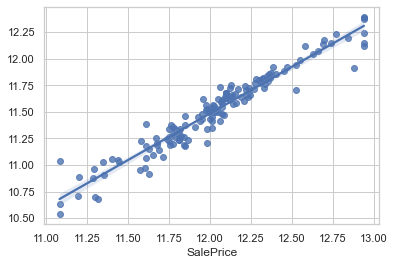

In [81]:
sns.regplot(x=y_test, y=y_predict, color="b")

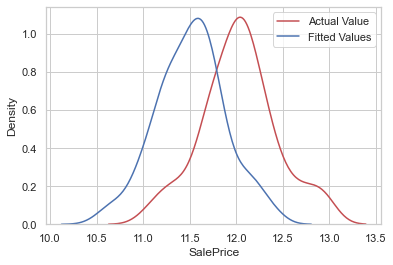

In [82]:
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values")
plt.legend()

### 2) Lasso regression

In [83]:
from sklearn import linear_model
model_LR = linear_model.Lasso(alpha=0.1)
model_LR.fit(X_train, y_train)
y_predict = model_LR.predict(X_test)
print('R2 score: ', r2_score(y_test,y_predict))
print('Mean absolute error: ', mean_absolute_error(y_test,y_predict))
print('Mean squared error: ', mean_squared_error(y_test,y_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_predict)))

R2 score:  0.7623153055423673
Mean absolute error:  0.1445473305629869
Mean squared error:  0.03936267678139105
Root mean squared error:  0.19840029430772285


<AxesSubplot:xlabel='SalePrice'>

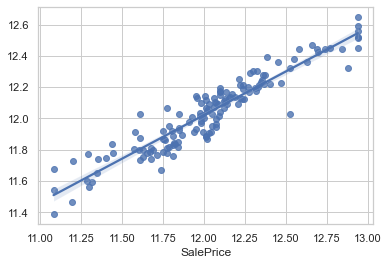

In [84]:
sns.regplot(x=y_test, y=y_predict, color="b")

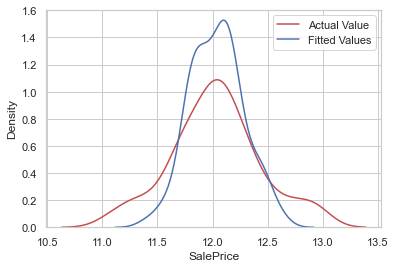

In [85]:
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values")
plt.legend()

### 3) Support Vector Regression (SVR)

In [86]:
from sklearn.svm import SVR
model_SVR = SVR()
model_SVR.fit(X_train, y_train)
y_predict = model_SVR.predict(X_test)
print('R2 score: ', r2_score(y_test,y_predict))
print('Mean absolute error: ', mean_absolute_error(y_test,y_predict))
print('Mean squared error: ', mean_squared_error(y_test,y_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_predict)))

R2 score:  -0.05866580924080478
Mean absolute error:  0.32319100581651194
Mean squared error:  0.17532437317323182
Root mean squared error:  0.4187175338736507


<AxesSubplot:xlabel='SalePrice'>

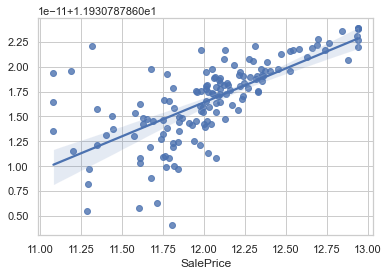

In [87]:
sns.regplot(x=y_test, y=y_predict, color="b")

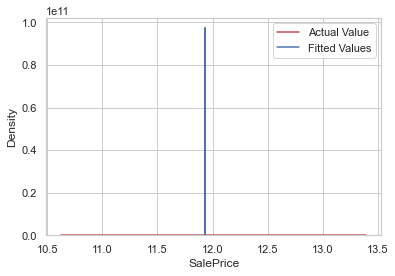

In [88]:
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values")
plt.legend()

### 4) Decision Tree Regression

In [89]:
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)
y_predict = model_DTR.predict(X_test)
print('R2 score: ', r2_score(y_test,y_predict))
print('Mean absolute error: ', mean_absolute_error(y_test,y_predict))
print('Mean squared error: ', mean_squared_error(y_test,y_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_predict)))

R2 score:  0.6616857035387378
Mean absolute error:  0.16124352660642347
Mean squared error:  0.05602782430949552
Root mean squared error:  0.23670197360709844


<AxesSubplot:xlabel='SalePrice'>

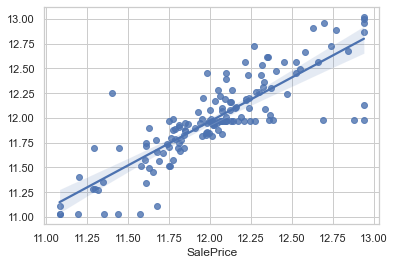

In [90]:
sns.regplot(x=y_test, y=y_predict, color="b")

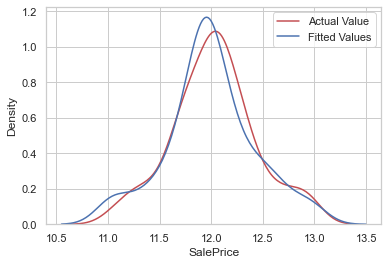

In [91]:
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values")
plt.legend()

### 5) XGB Regressor

In [92]:
from xgboost import XGBRegressor
model_XGBR = XGBRegressor()
model_XGBR.fit(X_train,y_train)
y_predict = model_XGBR.predict(X_test)
print('R2 score: ', r2_score(y_test,y_predict))
print('Mean absolute error: ', mean_absolute_error(y_test,y_predict))
print('Mean squared error: ', mean_squared_error(y_test,y_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_predict)))

R2 score:  0.8062554134937863
Mean absolute error:  0.14198041895549796
Mean squared error:  0.032085808277182666
Root mean squared error:  0.1791251190569951


<AxesSubplot:xlabel='SalePrice'>

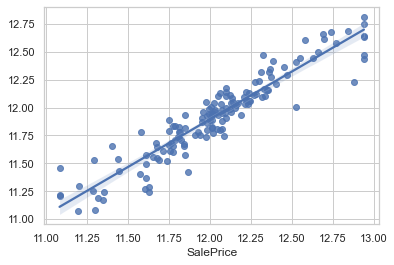

In [93]:
sns.regplot(x=y_test, y=y_predict, color="b")

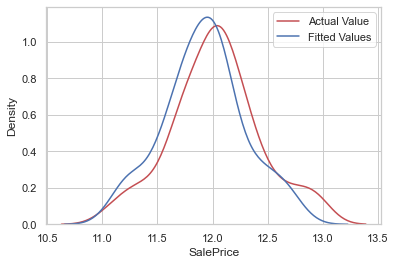

In [94]:
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values")
plt.legend()

### 6) Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train,y_train)
y_predict = model_RFR.predict(X_test)
print('R2 score: ', r2_score(y_test,y_predict))
print('Mean absolute error: ', mean_absolute_error(y_test,y_predict))
print('Mean squared error: ', mean_squared_error(y_test,y_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_predict)))

R2 score:  0.8971715981854377
Mean absolute error:  0.09041710329942751
Mean squared error:  0.01702928812395661
Root mean squared error:  0.13049631459913574


<AxesSubplot:xlabel='SalePrice'>

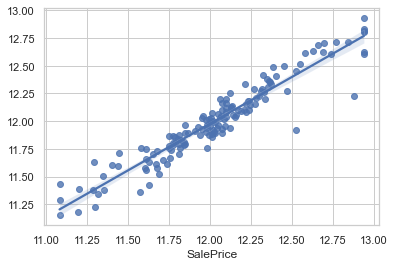

In [96]:
sns.regplot(x=y_test, y=y_predict, color="b")

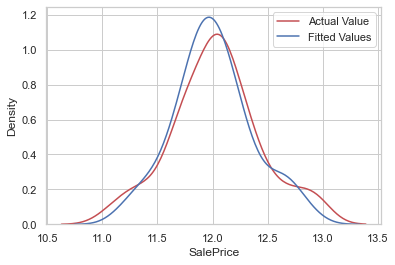

In [97]:
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values")
plt.legend()

Amongst the above regression algorithms, **Random forest regressor** gives better results with **R2 score of 0.89**. We can perform **hyperparameter tuning** to RFR model for optimization.

## Hyperparameter tuning

In [98]:
# Create a search grid of parameters that will be shuffled through

param_grid = {
'bootstrap': [True, False],
'max_depth': [1, 3, 5, 7, 9, None],
'max_features': ['auto', 'sqrt', 'log2'],
'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)],
'min_samples_split': [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)],
'n_estimators': [int(x) for x in np.arange(start = 20, stop = 1000, step = 20)],
'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson']
}

In [99]:
RFR_hypertuned_model = RandomForestRegressor()

In [100]:
from sklearn.model_selection import RandomizedSearchCV

RFR_RSCV = RandomizedSearchCV(RFR_hypertuned_model, param_distributions=param_grid, n_iter=10,
                              n_jobs=1, cv=5, random_state=42)

In [101]:
RFR_RSCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error', 'mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 3, 5, 7, 9, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                           

In [102]:
best_score = RFR_RSCV.best_score_
best_score

0.881980301738561

In [103]:
best_params = RFR_RSCV.best_params_
best_params

{'n_estimators': 440,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'mse',
 'bootstrap': False}

In [104]:
# defining the best parameters generated from RandomizedSearchCV

RFR_new_model = RandomForestRegressor(
                n_estimators= 440,
                min_samples_split= 2,
                min_samples_leaf= 5,
                max_features= 'sqrt',
                max_depth= None,
                criterion= 'mse',
                bootstrap= False
)

In [105]:
RFR_new_model.fit(X_train, y_train)
y_predict = RFR_new_model.predict(X_test)
print('R2 score: ', r2_score(y_test,y_predict))
print('Mean absolute error: ', mean_absolute_error(y_test,y_predict))
print('Mean squared error: ', mean_squared_error(y_test,y_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_predict)))

R2 score:  0.8681601441441127
Mean absolute error:  0.10625759107722298
Mean squared error:  0.02183384018395647
Root mean squared error:  0.14776278348744135


<AxesSubplot:xlabel='SalePrice'>

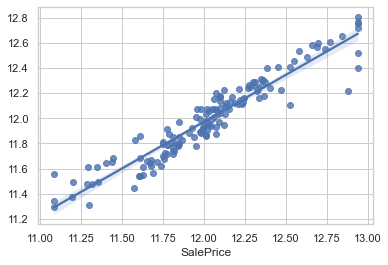

In [106]:
sns.regplot(x=y_test, y=y_predict, color="b")

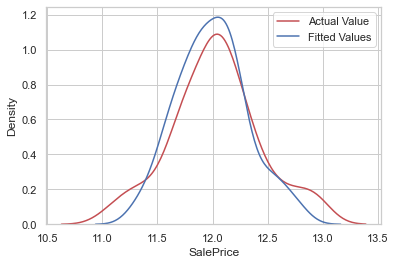

In [107]:
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values")
plt.legend()

As we can see, hyperparameter tuning does not enhance the performance of the RFR model in this case. Hence, the initial **Random forest regressor yields better results with R2 score of 0.89**.